## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure

import pandas_profiling

## Importing the data

In [2]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/antunes-lima/Python-Movie-Industry-Analysis/main/movies.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1320k  100 1320k    0     0  1513k      0 --:--:-- --:--:-- --:--:-- 1511k


In [3]:
df = pd.read_csv('/content/movies.csv')

df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4663,Serenity,PG-13,Action,2005,"September 30, 2005 (United States)",7.8,287000.0,Joss Whedon,Joss Whedon,Nathan Fillion,United States,39000000.0,4.044513e+07,Universal Pictures,119.0
3856,A Beautiful Mind,PG-13,Biography,2001,"January 4, 2002 (United States)",8.2,871000.0,Ron Howard,Akiva Goldsman,Russell Crowe,United States,58000000.0,3.167913e+08,Universal Pictures,135.0
2290,Dave,PG-13,Comedy,1993,"May 7, 1993 (United States)",6.8,50000.0,Ivan Reitman,Gary Ross,Kevin Kline,United States,28000000.0,6.327071e+07,Warner Bros.,110.0
428,The Star Chamber,R,Crime,1983,"August 5, 1983 (United States)",6.3,6500.0,Peter Hyams,Roderick Taylor,Michael Douglas,United States,NaN,5.555305e+06,Twentieth Century Fox,109.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
1090,Wings of Desire,PG-13,Drama,1987,"May 6, 1988 (United States)",8.0,67000.0,Wim Wenders,Wim Wenders,Bruno Ganz,West Germany,NaN,3.404057e+06,Road Movies Filmproduktion,128.0
308,The Return of Martin Guerre,Not Rated,Biography,1982,"August 26, 1983 (United States)",7.4,4100.0,Daniel Vigne,Jean-Claude Carrière,Gérard Depardieu,France,NaN,3.723036e+06,S.F.P.C.,112.0
6789,The Man Who Knew Infinity,PG-13,Biography,2015,"April 29, 2016 (United States)",7.2,53000.0,Matt Brown,Matt Brown,Dev Patel,United Kingdom,10000000.0,1.225268e+07,Pressman Film,108.0
7539,Can You Keep a Secret?,Not Rated,Comedy,2019,"September 13, 2019 (United States)",5.3,12000.0,Elise Durán,Peter Hutchings,Alexandra Daddario,United States,NaN,1.378160e+06,BCDF Pictures,94.0
6473,The Giver,PG-13,Drama,2014,"August 15, 2014 (United States)",6.5,114000.0,Phillip Noyce,Michael Mitnick,Brenton Thwaites,United States,25000000.0,6.698046e+07,Tonik Productions,97.0


## Initial look at the data

In [4]:
#!pip install pandas-profiling==2.7.1

In [5]:
#from pandas_profiling import ProfileReport

#profile_df = ProfileReport(df)

#profile_df.to_notebook_iframe()

In [6]:
# checking data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# checking df shape (rows, columns)

df.shape

(7668, 15)

In [8]:
# checking how many null values on each column

df.isnull().sum(axis=0)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
# checking percent of missing values

for col in df.columns:
  missing = round(np.mean(df[col].isnull())*100, 2)
  print('{} - {}%'.format(col, missing))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [10]:
# checking how many unique values on each column

df.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

## Starting Data Cleaning

In [45]:
# some films have year != release date year
# spliting the released column and creating a new column with the year from released

df['year_release'] = df['released'].astype('str').str.split(n=4, expand=True)[2]

df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
7047,Spider-Man: Homecoming,PG-13,Action,2017,"July 7, 2017 (United States)",7.4,540000.0,Jon Watts,Jonathan Goldstein,Tom Holland,United States,175000000.0,880166924.0,Columbia Pictures,133.0,2017
816,Bal na vodi,R,Drama,1985,"October 24, 1985 (Yugoslavia)",7.6,804.0,Jovan Acin,Jovan Acin,Gala Videnovic,Yugoslavia,NaN,NaN,CFS Avala Film,112.0,1985
6184,The Angels' Share,R,Comedy,2012,"June 1, 2012 (United Kingdom)",7.0,24000.0,Ken Loach,Paul Laverty,Paul Brannigan,United Kingdom,NaN,13090471.0,Entertainment One,101.0,2012
316,Richard Pryor: Live on the Sunset Strip,R,Comedy,1982,"March 12, 1982 (United States)",7.7,3900.0,Joe Layton,Paul Mooney,Richard Pryor,United States,NaN,36299720.0,Columbia Pictures,82.0,1982
421,"Yor, the Hunter from the Future",PG,Action,1983,"August 19, 1983 (United States)",4.4,2900.0,Antonio Margheriti,Juan Zanotto,Reb Brown,Italy,NaN,2810199.0,Diamant Film,88.0,1983
6285,The Way Way Back,PG-13,Comedy,2013,"July 26, 2013 (United States)",7.4,143000.0,Nat Faxon,Nat Faxon,Steve Carell,United States,5000000.0,26474920.0,Sycamore Pictures,103.0,2013
1290,Halloween 4: The Return of Michael Myers,R,Horror,1988,"October 21, 1988 (United States)",5.9,45000.0,Dwight H. Little,Dhani Lipsius,Donald Pleasence,United States,5000000.0,17768757.0,Trancas International Films,88.0,1988
6313,Adore,R,Drama,2013,"April 3, 2013 (France)",6.2,33000.0,Anne Fontaine,Anne Fontaine,Naomi Watts,Australia,16000000.0,1575749.0,Gaumont,112.0,2013
6089,Lore,Not Rated,Drama,2012,"September 20, 2012 (Australia)",7.1,15000.0,Cate Shortland,Cate Shortland,Saskia Rosendahl,Australia,NaN,2362019.0,Rohfilm,109.0,2012
2453,Dumb and Dumber,PG-13,Comedy,1994,"December 16, 1994 (United States)",7.3,361000.0,Peter Farrelly,Peter Farrelly,Jim Carrey,United States,17000000.0,247275374.0,New Line Cinema,107.0,1994


In [46]:
# checking the results

df.year_release.value_counts(dropna=False)

2019           227
2015           213
2007           212
2011           211
1986           208
              ... 
(United         45
2020            32
NaN              6
States)          6
(Australia)      2
Name: year_release, Length: 45, dtype: int64

In [47]:
# did not work for some value that did not have month/day

df.sort_values(by=['year_release'], inplace=False, ascending=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
5958,The Human Centipede II (Full Sequence),Not Rated,Horror,2011,November 2011 (Australia),3.8,37000.0,Tom Six,Tom Six,Laurence R. Harvey,Netherlands,NaN,170323.0,Six Entertainment Company,91.0,(Australia)
5833,Hatchet II,R,Action,2010,November 2010 (Australia),5.5,13000.0,Adam Green,Adam Green,Danielle Harris,United States,800000.0,156190.0,ArieScope Pictures,85.0,(Australia)
463,Slayground,R,Crime,1983,February 1984 (United States),4.9,360.0,Terry Bedford,Trevor Preston,Peter Coyote,United Kingdom,NaN,108128.0,Jennie and Company,89.0,(United
2029,Liebestraum,R,Mystery,1991,November 1991 (United States),5.9,1500.0,Mike Figgis,Mike Figgis,Kevin Anderson,United States,6900000.0,133645.0,Initial Entertainment Group (IEG),112.0,(United
1735,The Comfort of Strangers,R,Drama,1990,April 1991 (United States),6.3,5000.0,Paul Schrader,Ian McEwan,Christopher Walken,United States,NaN,1244381.0,Erre Produzioni,107.0,(United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Taipei Story,Not Rated,Drama,1985,1985 (Taiwan),7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,NaN,35336.0,Evergreen Film Company,119.0,None
1825,Strangers in Good Company,PG,Drama,1990,1990 (Canada),7.7,995.0,Cynthia Scott,Gloria Demers,Alice Diabo,Canada,NaN,NaN,National Film Board of Canada (NFB),101.0,None
2816,The White Balloon,Unrated,Drama,1995,1995 (Iran),7.7,6900.0,Jafar Panahi,Abbas Kiarostami,Aida Mohammadkhani,Iran,150000.0,924940.0,Farabi Cinema Foundation,85.0,None
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN,None


Trying another method:

In [84]:
# searching for 4 digits in the release date using a regular expression, and using it as year of release

df['year_release'] = df['released'].str.extract(r'(\d{4})', expand=False)

df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release,month_release,day_release,date_release
4964,"Paris, je t'aime",R,Comedy,2006,"June 15, 2007 (United States)",7.2,71000.0,Directors,Tristan Carné,Juliette Binoche,France,13000000.0,17471727.0,Victoires International,120.0,2007,06,15,2007-06
1206,Hello Again,PG,Comedy,1987,"November 6, 1987 (United States)",5.3,3200.0,Frank Perry,Susan Isaacs,Shelley Long,United States,NaN,20419446.0,Touchstone Pictures,96.0,1987,11,6,1987-11
4049,Road to Perdition,R,Crime,2002,"July 12, 2002 (United States)",7.7,253000.0,Sam Mendes,Max Allan Collins,Tom Hanks,United States,80000000.0,181001478.0,Dreamworks Pictures,117.0,2002,07,12,2002-07
6481,Unbroken,PG-13,Action,2014,"December 25, 2014 (United States)",7.2,155000.0,Angelina Jolie,Joel Coen,Jack O'Connell,United States,65000000.0,161459297.0,3 Arts Entertainment,137.0,2014,12,25,2014-12
919,Bad Blood,Unrated,Crime,1986,"November 26, 1986 (France)",7.3,7500.0,Leos Carax,Leos Carax,Michel Piccoli,Switzerland,NaN,58731.0,Les Films Plain Chant,105.0,1986,11,26,1986-11
7194,A Taxi Driver,Not Rated,Action,2017,"August 11, 2017 (United States)",7.9,19000.0,Hun Jang,Yu-na Eom,Kang-ho Song,South Korea,NaN,86252940.0,The Lamp,137.0,2017,08,11,2017-08
7025,Mr. Church,PG-13,Comedy,2016,"November 11, 2016 (Netherlands)",7.7,27000.0,Bruce Beresford,Susan McMartin,Eddie Murphy,United States,8000000.0,685780.0,Cinelou Films,104.0,2016,11,11,2016-11
363,Breathless,R,Action,1983,"May 13, 1983 (United States)",5.9,8700.0,Jim McBride,François Truffaut,Richard Gere,United States,7500000.0,19910002.0,Breathless Associates,100.0,1983,05,13,1983-05
5951,Fright Night,R,Comedy,2011,"August 19, 2011 (United States)",6.4,101000.0,Craig Gillespie,Marti Noxon,Anton Yelchin,United States,30000000.0,41002607.0,Dreamworks Pictures,106.0,2011,08,19,2011-08
4265,Terminator 3: Rise of the Machines,R,Action,2003,"July 2, 2003 (United States)",6.3,383000.0,Jonathan Mostow,John Brancato,Arnold Schwarzenegger,United States,200000000.0,433371112.0,C-2 Pictures,109.0,2003,07,2,2003-07


In [86]:
# better sollution now, but now we have 2 nulls because the release date has 2 null values.

df.year_release.value_counts(dropna=False)

2019    228
2015    213
2011    212
2007    212
1986    211
       ... 
1982    128
1981    103
1980     80
2020     32
NaN       2
Name: year_release, Length: 42, dtype: int64

In [87]:
# The original year column did not have nulls, so we are going to get year from there for the null cases

df.year_release.fillna(df.year, inplace=True)

df.year_release.value_counts(dropna=False)

2019    228
2015    213
2011    212
2007    212
1986    211
       ... 
1982    128
1981    103
1980     80
2020     32
2010      2
Name: year_release, Length: 42, dtype: int64

## Company Income Aggregation

In [88]:
# sorting the table by film relevance, using gross column for this

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release,month_release,day_release,date_release
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009,12,18,2009-12
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019,04,26,2019-04
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997,12,19,1997-12
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015,12,18,2015-12
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018,04,27,2018-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020,10,23,2020-10
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020,02,7,2020-02
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020,04,27,2020-04
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020,10,1,2020-10


In [130]:
# changing the number of rows that pandas show to us

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

In [44]:
# now we can scroll trough the rows

# df.sort_values(by=['gross'], inplace=False, ascending=False)

In [24]:
# generating a list of the largest companies by gross income

df_company = df.groupby('company', as_index=False).agg({'gross' : 'sum'})

df_company.sort_values(by=['gross'], inplace=True, ascending=False)

df_company.head(10)

,company,gross
2319,Warner Bros.,5.649142e+10
2281,Universal Pictures,5.251419e+10
731,Columbia Pictures,4.300894e+10
1812,Paramount Pictures,4.049361e+10
2253,Twentieth Century Fox,4.025705e+10
2316,Walt Disney Pictures,3.632789e+10
1713,New Line Cinema,1.988380e+10
1606,Marvel Studios,1.506559e+10
887,DreamWorks Animation,1.187361e+10
2232,Touchstone Pictures,1.179583e+10


## Scatter Plot of Budget and Gross Income

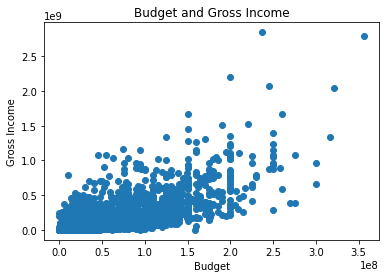

In [26]:
# generating a scatter plot of budget and gross income (using matplotlib)

plt.scatter(x=df['budget'],
            y=df['gross'])

plt.title('Budget and Gross Income')
plt.xlabel('Budget')
plt.ylabel('Gross Income')

plt.show()

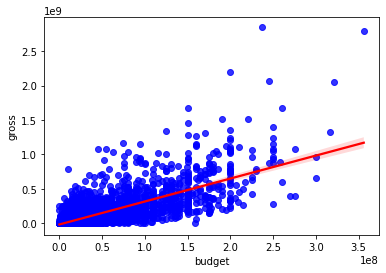

In [28]:
# generating a scatter plot of budget and gross income (using seaborn)

sns.regplot(data=df, 
            x='budget',
            y='gross',
            scatter_kws={"color":"blue"},
            line_kws={"color":"red"})

## Checking Correlations

In [30]:
# calculating the actual correlation

# pearson method, measures how close it is to a linear correlation

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [31]:
# spearman method, measures how close it is to a monotonic function (non-linear correlation)

df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


In [34]:
# kendall method, similar to spearman, as it's also a rank correlation, also measures a monotonic relationship (non-linear correlation)

df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


For this data, we will stick with Pearson's correlation, because it turned out to be well placed on the chart. The data seems to follow well a linear correlation.

From this table we can see that the correlation of budget vs gross income is equal to 0.740395

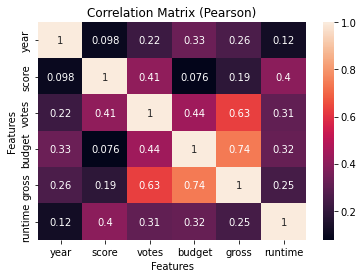

In [35]:
# making a correlation matrix, using seaborn heat map

correlation = df.corr(method='pearson')

sns.heatmap(correlation, annot=True)

plt.title('Correlation Matrix (Pearson)')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()


## Standardizing Date Info

In [89]:
# coming back to data types

df.dtypes

name              object
rating            object
genre             object
year               int64
released          object
                  ...   
runtime          float64
year_release      object
month_release     object
day_release       object
date_release      object
Length: 19, dtype: object

In [92]:
# extracting also the month from released, to a new column

df['month_release'] = df['released'].str.split(pat='(', expand=True)[0]

df.month_release.value_counts(dropna=False)

October 4, 1991       9
May 17, 2019          9
February 14, 1986     9
January 21, 2000      8
August 9, 2019        8
                     ..
May 24, 2000          1
June 20, 1999         1
February 11, 1999     1
September 4, 1999     1
August 19, 2020       1
Name: month_release, Length: 2956, dtype: int64

In [94]:
df['month_release'] = df['month_release'].str.extract(r'(^[a-zA-Z]{3})', expand=False)

df.month_release.value_counts(dropna=False)

Oct    758
Aug    738
Mar    684
Nov    657
Sep    652
      ... 
Jul    584
May    581
Dec    581
Jun    561
NaN     12
Name: month_release, Length: 13, dtype: int64

In [95]:
df.month_release = df.month_release.str.replace(pat='Jan', repl='01', regex=False)
df.month_release = df.month_release.str.replace(pat='Feb', repl='02', regex=False)
df.month_release = df.month_release.str.replace(pat='Mar', repl='03', regex=False)
df.month_release = df.month_release.str.replace(pat='Apr', repl='04', regex=False)
df.month_release = df.month_release.str.replace(pat='May', repl='05', regex=False)
df.month_release = df.month_release.str.replace(pat='Jun', repl='06', regex=False)
df.month_release = df.month_release.str.replace(pat='Jul', repl='07', regex=False)
df.month_release = df.month_release.str.replace(pat='Aug', repl='08', regex=False)
df.month_release = df.month_release.str.replace(pat='Sep', repl='09', regex=False)
df.month_release = df.month_release.str.replace(pat='Oct', repl='10', regex=False)
df.month_release = df.month_release.str.replace(pat='Nov', repl='11', regex=False)
df.month_release = df.month_release.str.replace(pat='Dec', repl='12', regex=False)

df.month_release.value_counts(dropna=False)

10     758
08     738
03     684
11     657
09     652
      ... 
07     584
05     581
12     581
06     561
NaN     12
Name: month_release, Length: 13, dtype: int64

In [96]:
# extracting also the day from released, to a new column

df['day_release'] = df['released'].str.split(pat='(', expand=True)[0]
df['day_release'] = df['day_release'].str.split(pat=',', expand=True)[0]

df.day_release.value_counts(dropna=False)

December 25       112
December 21        44
November 21        41
November 22        37
February 14        36
                 ... 
March 1985          1
February 1984       1
July 1992           1
May 1991            1
2013                1
Name: day_release, Length: 413, dtype: int64

In [97]:
df['day_release'] = df['day_release'].str.extract(r'(?:\D+)(\d{1,2})$', expand=False)

df.day_release.value_counts(dropna=False)

25     363
21     307
19     282
22     279
18     276
      ... 
4      211
5      210
29     203
31     131
NaN     59
Name: day_release, Length: 32, dtype: int64

In [101]:
# creating a date_release column, using the date info we gathered
# YYYY-MM-DD format

df['date_release'] = df.year_release.str.cat(df.month_release, sep='-')
df['date_release'] = df.date_release.str.cat(df.day_release, sep='-')

df.date_release.value_counts(dropna=False)

NaN           59
1986-02-14     9
2019-05-17     9
1991-10-4      9
2007-10-19     8
              ..
2005-01-26     1
2004-10-30     1
2005-01-13     1
2004-09-26     1
2020-08-19     1
Name: date_release, Length: 2910, dtype: int64

In [102]:
df.isnull().sum(axis=0)

name              0
rating           77
genre             0
year              0
released          2
                 ..
runtime           4
year_release      0
month_release    12
day_release      59
date_release     59
Length: 19, dtype: int64

## Converting Data types to Numerical

In [104]:
# changing year_release, month_release and day_released to float type

df['year_release'] = df['year_release'].astype('float')
df['month_release'] = df['month_release'].astype('float')
df['day_release'] = df['day_release'].astype('float')

In [106]:
# changing the date_release column to datetime

df['date_release'] = pd.to_datetime(df['date_release'])

In [107]:
df.dtypes

name                     object
rating                   object
genre                    object
year                      int64
released                 object
                      ...      
runtime                 float64
year_release            float64
month_release           float64
day_release             float64
date_release     datetime64[ns]
Length: 19, dtype: object

In [111]:
# converting the non-numerical data to category, so we can also see correlations about them

df_numerized = df.copy()

for column in df_numerized.columns:
  if df_numerized[column].dtype == 'object':
    df_numerized[column] = df_numerized[column].astype('category')
    df_numerized[column] = df_numerized[column].cat.codes

df_numerized.dtypes

name                      int16
rating                     int8
genre                      int8
year                      int64
released                  int16
                      ...      
runtime                 float64
year_release            float64
month_release           float64
day_release             float64
date_release     datetime64[ns]
Length: 19, dtype: object

In [113]:
df_numerized = df_numerized.sort_values(by=['gross'], inplace=False, ascending=False)

df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release,month_release,day_release,date_release
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,2009.0,12.0,18.0,2009-12-18
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,2019.0,4.0,26.0,2019-04-26
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,1997.0,12.0,19.0,1997-12-19
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,2015.0,12.0,18.0,2015-12-18
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,2018.0,4.0,27.0,2018-04-27
7480,6194,4,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000.0,1.670728e+09,2316,118.0,2019.0,7.0,19.0,2019-07-19
6653,2969,5,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000.0,1.670516e+09,2281,124.0,2015.0,6.0,12.0,2015-06-12
6043,5502,5,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000.0,1.518816e+09,1606,143.0,2012.0,5.0,4.0,2012-05-04
6646,2145,5,0,2015,221,7.1,370000.0,1189,706,2721,55,190000000.0,1.515341e+09,2281,137.0,2015.0,4.0,3.0,2015-04-03
7494,2131,4,2,2019,2676,6.8,148000.0,432,1950,1527,55,150000000.0,1.450027e+09,2315,103.0,2019.0,11.0,22.0,2019-11-22


## Correlations Including Categorical Data

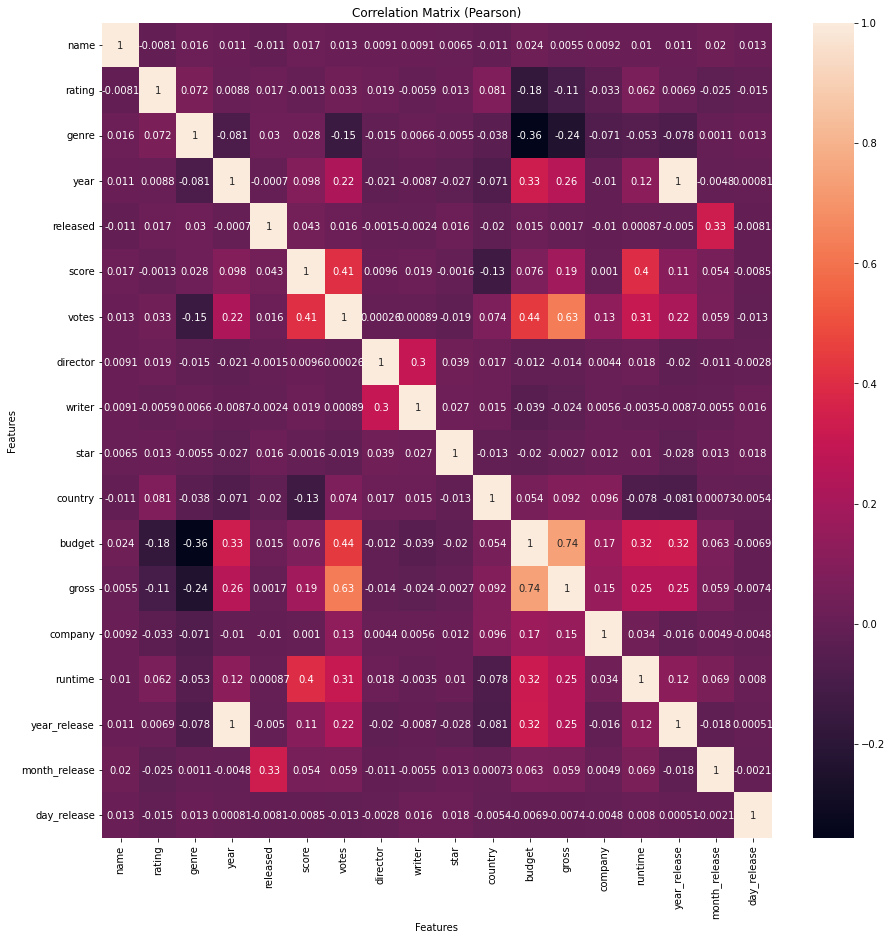

In [126]:
# making a correlation matrix, this time using the categorical data

correlation_v2 = df_numerized.corr(method='pearson')

sns.heatmap(correlation_v2, annot=True)

plt.title('Correlation Matrix (Pearson)')
plt.xlabel('Features')
plt.ylabel('Features')

plt.rcParams['figure.figsize'] = [15, 15]

plt.show()

In [132]:
correlation_v2_pairs = correlation_v2.unstack()

correlation_v2_pairs

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011311
               score            0.017097
               votes            0.013088
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.023970
               gross            0.005533
               company          0.009211
               runtime          0.010392
               year_release     0.010900
               month_release    0.019874
               day_release      0.012790
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               year             0.008779
               released         0.016613
               score           -0.001314
               v

In [131]:
correlation_v2_pairs_sorted = correlation_v2_pairs.sort_values()

correlation_v2_pairs_sorted

budget         genre           -0.356564
genre          budget          -0.356564
gross          genre           -0.235650
genre          gross           -0.235650
budget         rating          -0.176002
rating         budget          -0.176002
votes          genre           -0.145307
genre          votes           -0.145307
score          country         -0.133348
country        score           -0.133348
gross          rating          -0.107339
rating         gross           -0.107339
country        year_release    -0.081448
year_release   country         -0.081448
genre          year            -0.081261
year           genre           -0.081261
country        runtime         -0.078412
runtime        country         -0.078412
year_release   genre           -0.077751
genre          year_release    -0.077751
company        genre           -0.071067
genre          company         -0.071067
year           country         -0.070938
country        year            -0.070938
runtime        g

In [ ]:
# After all we found a high correlation between budget and gross income
# Also between gross income and votes